In [490]:
### Basic data analysis or exploratory data analysis (EDA)

In [491]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [492]:
# Read Training dataset as well as drop the index column
training_data = pd.read_csv('C:/Users/yeung/Downloads/cs-training.csv').drop('Unnamed: 0', axis = 1)


# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-', '').lower())
training_data.columns = cleancolumn

### Outliers Detection

In [493]:

# Percentile based outlier detection
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return ((data < minval) | (data > maxval))

# Another percentile based outlier detection method which is based on inter quartile (IQR) range
# def outliers_iqr(ys):
#    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
#    iqr = quartile_3 - quartile_1
#    lower_bound = quartile_1 - (iqr * 1.5)
#    upper_bound = quartile_3 + (iqr * 1.5)
#   return np.where((ys > upper_bound) | (ys < lower_bound))








In [494]:
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold


In [495]:
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier



In [496]:
## Other outlier detection methods

In [497]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

def isolation_forest_outlier(data, threshold=0.05):
    imputer = SimpleImputer(strategy='median')  # Use a median imputer to handle missing values
    data_imputed = imputer.fit_transform(data.values.reshape(-1, 1))

    clf = IsolationForest(contamination=threshold)
    return clf.fit_predict(data_imputed) == -1

In [498]:
from sklearn.cluster import DBSCAN

def dbscan_outlier(data, eps=0.5, min_samples=5):
    imputer = SimpleImputer(strategy='median')
    data_imputed = imputer.fit_transform(data.values.reshape(-1, 1))

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data_imputed)
    return labels == -1

In [499]:
from sklearn.covariance import EllipticEnvelope

def robust_covariance_outlier(data, contamination=0.05):
    imputer = SimpleImputer(strategy='median')
    data_imputed = imputer.fit_transform(data.values.reshape(-1, 1))

    robust_cov = EllipticEnvelope(contamination=contamination, support_fraction=1.0)  
    robust_cov.fit(data_imputed)
    return robust_cov.predict(data_imputed) == -1

In [500]:
from sklearn.svm import OneClassSVM

def one_class_svm_outlier(data, nu=0.05):
    imputer = SimpleImputer(strategy='median')
    data_imputed = imputer.fit_transform(data.values.reshape(-1, 1))

    svm = OneClassSVM(nu=nu)
    svm.fit(data_imputed)
    return svm.predict(data_imputed) == -1

In [501]:
def outlierVote(data):
    t = percentile_based_outlier(data)
    u = mad_based_outlier(data)
    v = std_div(data)
    w = isolation_forest_outlier(data)
    x = dbscan_outlier(data)
    y = robust_covariance_outlier(data)
    z = one_class_svm_outlier(data)
    temp = list(zip(data.index, t, u, v, w, x, y, z))
    final = []
    for i in range(len(temp)):
        if list(temp[i]).count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final




In [502]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=8, figsize=(15, 20))
    funcs = [percentile_based_outlier, mad_based_outlier, std_div, isolation_forest_outlier, dbscan_outlier, robust_covariance_outlier, one_class_svm_outlier, outlierVote]
    titles = ['Percentile-based Outliers', 'MAD-based Outliers', 'STD-based Outliers', 'Isolation Forest Outliers',
              'DBSCAN Outliers', 'Robust Covariance Outliers', 'One-Class SVM Outliers', 'Majority Vote Outliers']

    for ax, func, title in zip(axes, funcs, titles):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
        ax.set_title(title, size=18)
        ax.set_xlim([x.min() - x.max()*0.05, x.max() ])  # Set larger margin before zero

    fig.suptitle('Comparing Outlier Tests (n={})'.format(len(x)), size=22)
    plt.subplots_adjust(hspace=0.6)
    plt.tight_layout()
    plt.show()

C:\Users\yeung\AppData\Local\Temp\ipykernel_10588\729217769.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax, rug=True, hist=False)
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instea

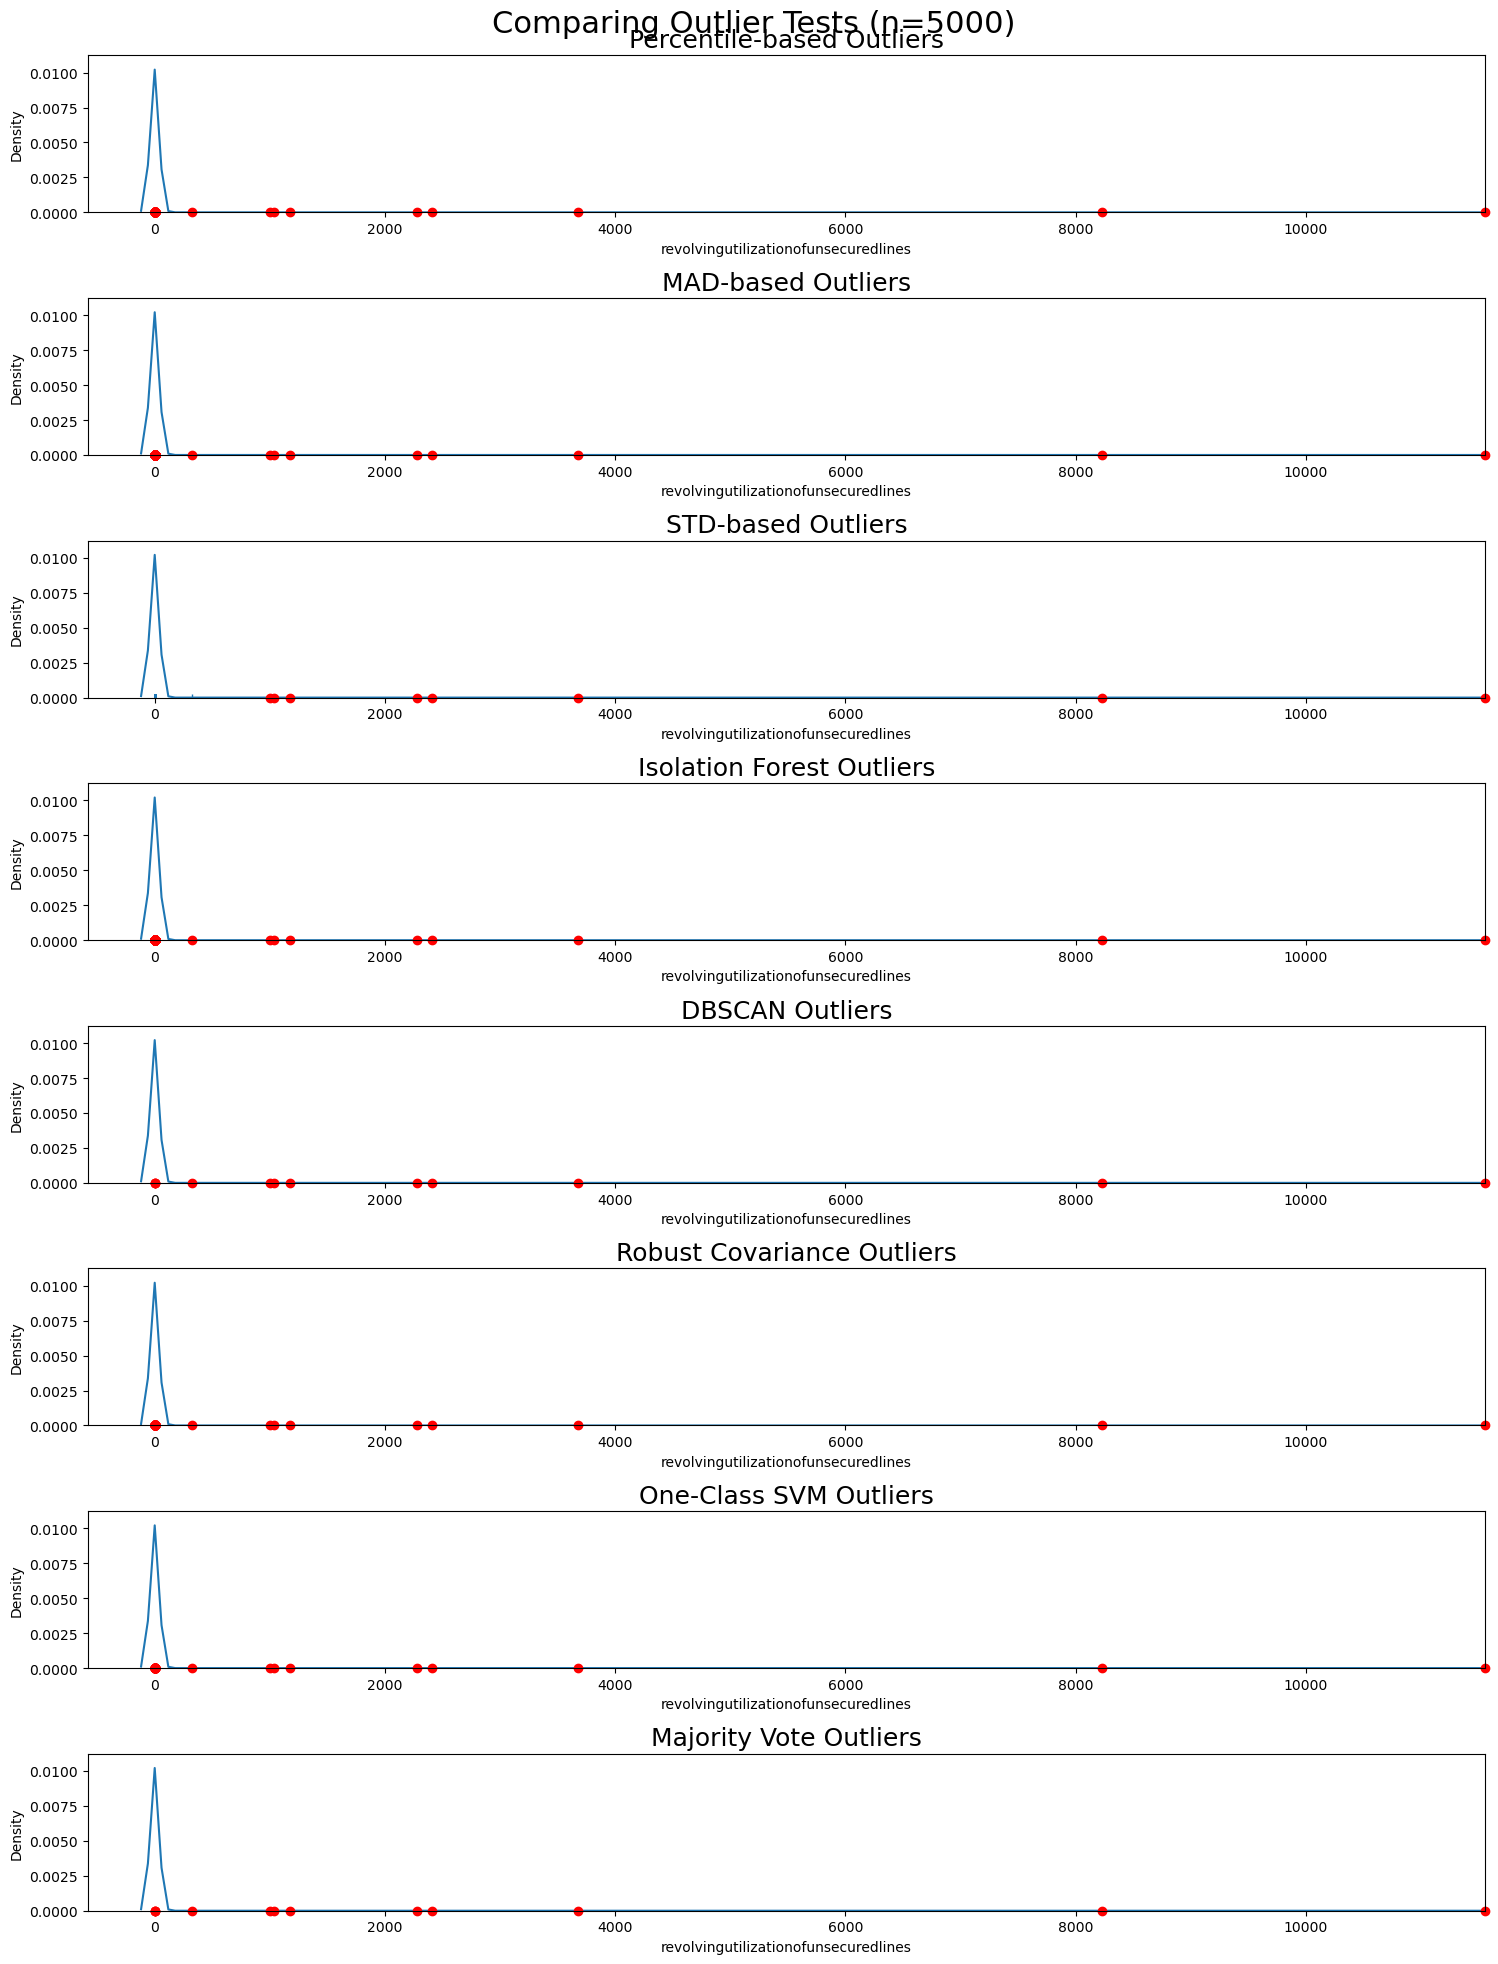

In [503]:
plotOutlier(training_data.revolvingutilizationofunsecuredlines.sample(5000))

C:\Users\yeung\AppData\Local\Temp\ipykernel_10588\729217769.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax, rug=True, hist=False)
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instea

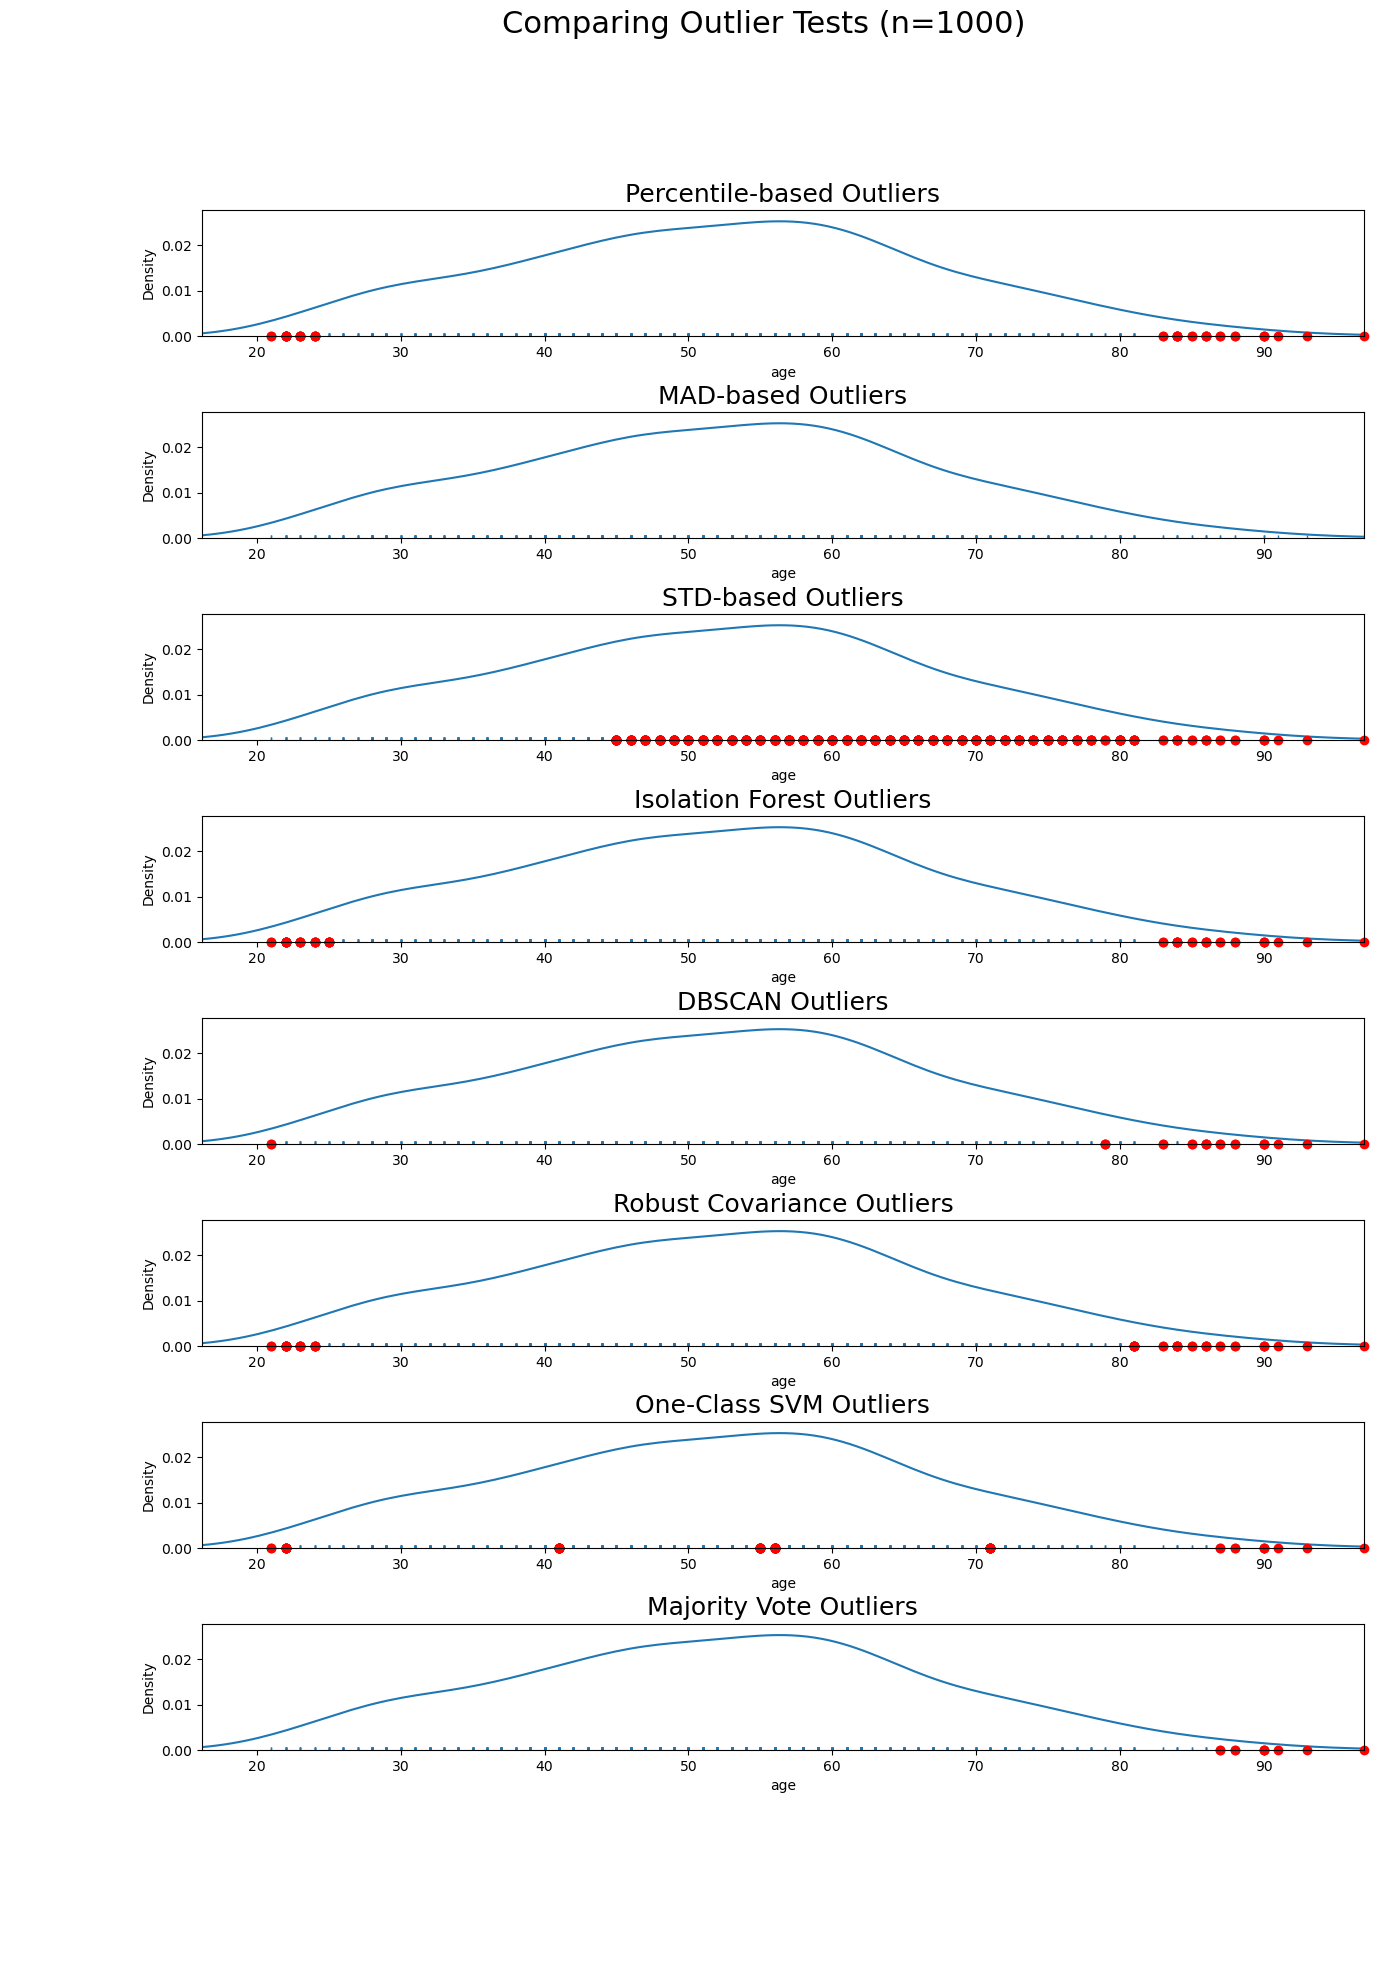

In [504]:
plotOutlier(training_data.age.sample(1000))

C:\Users\yeung\AppData\Local\Temp\ipykernel_10588\729217769.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax, rug=True, hist=False)
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instea

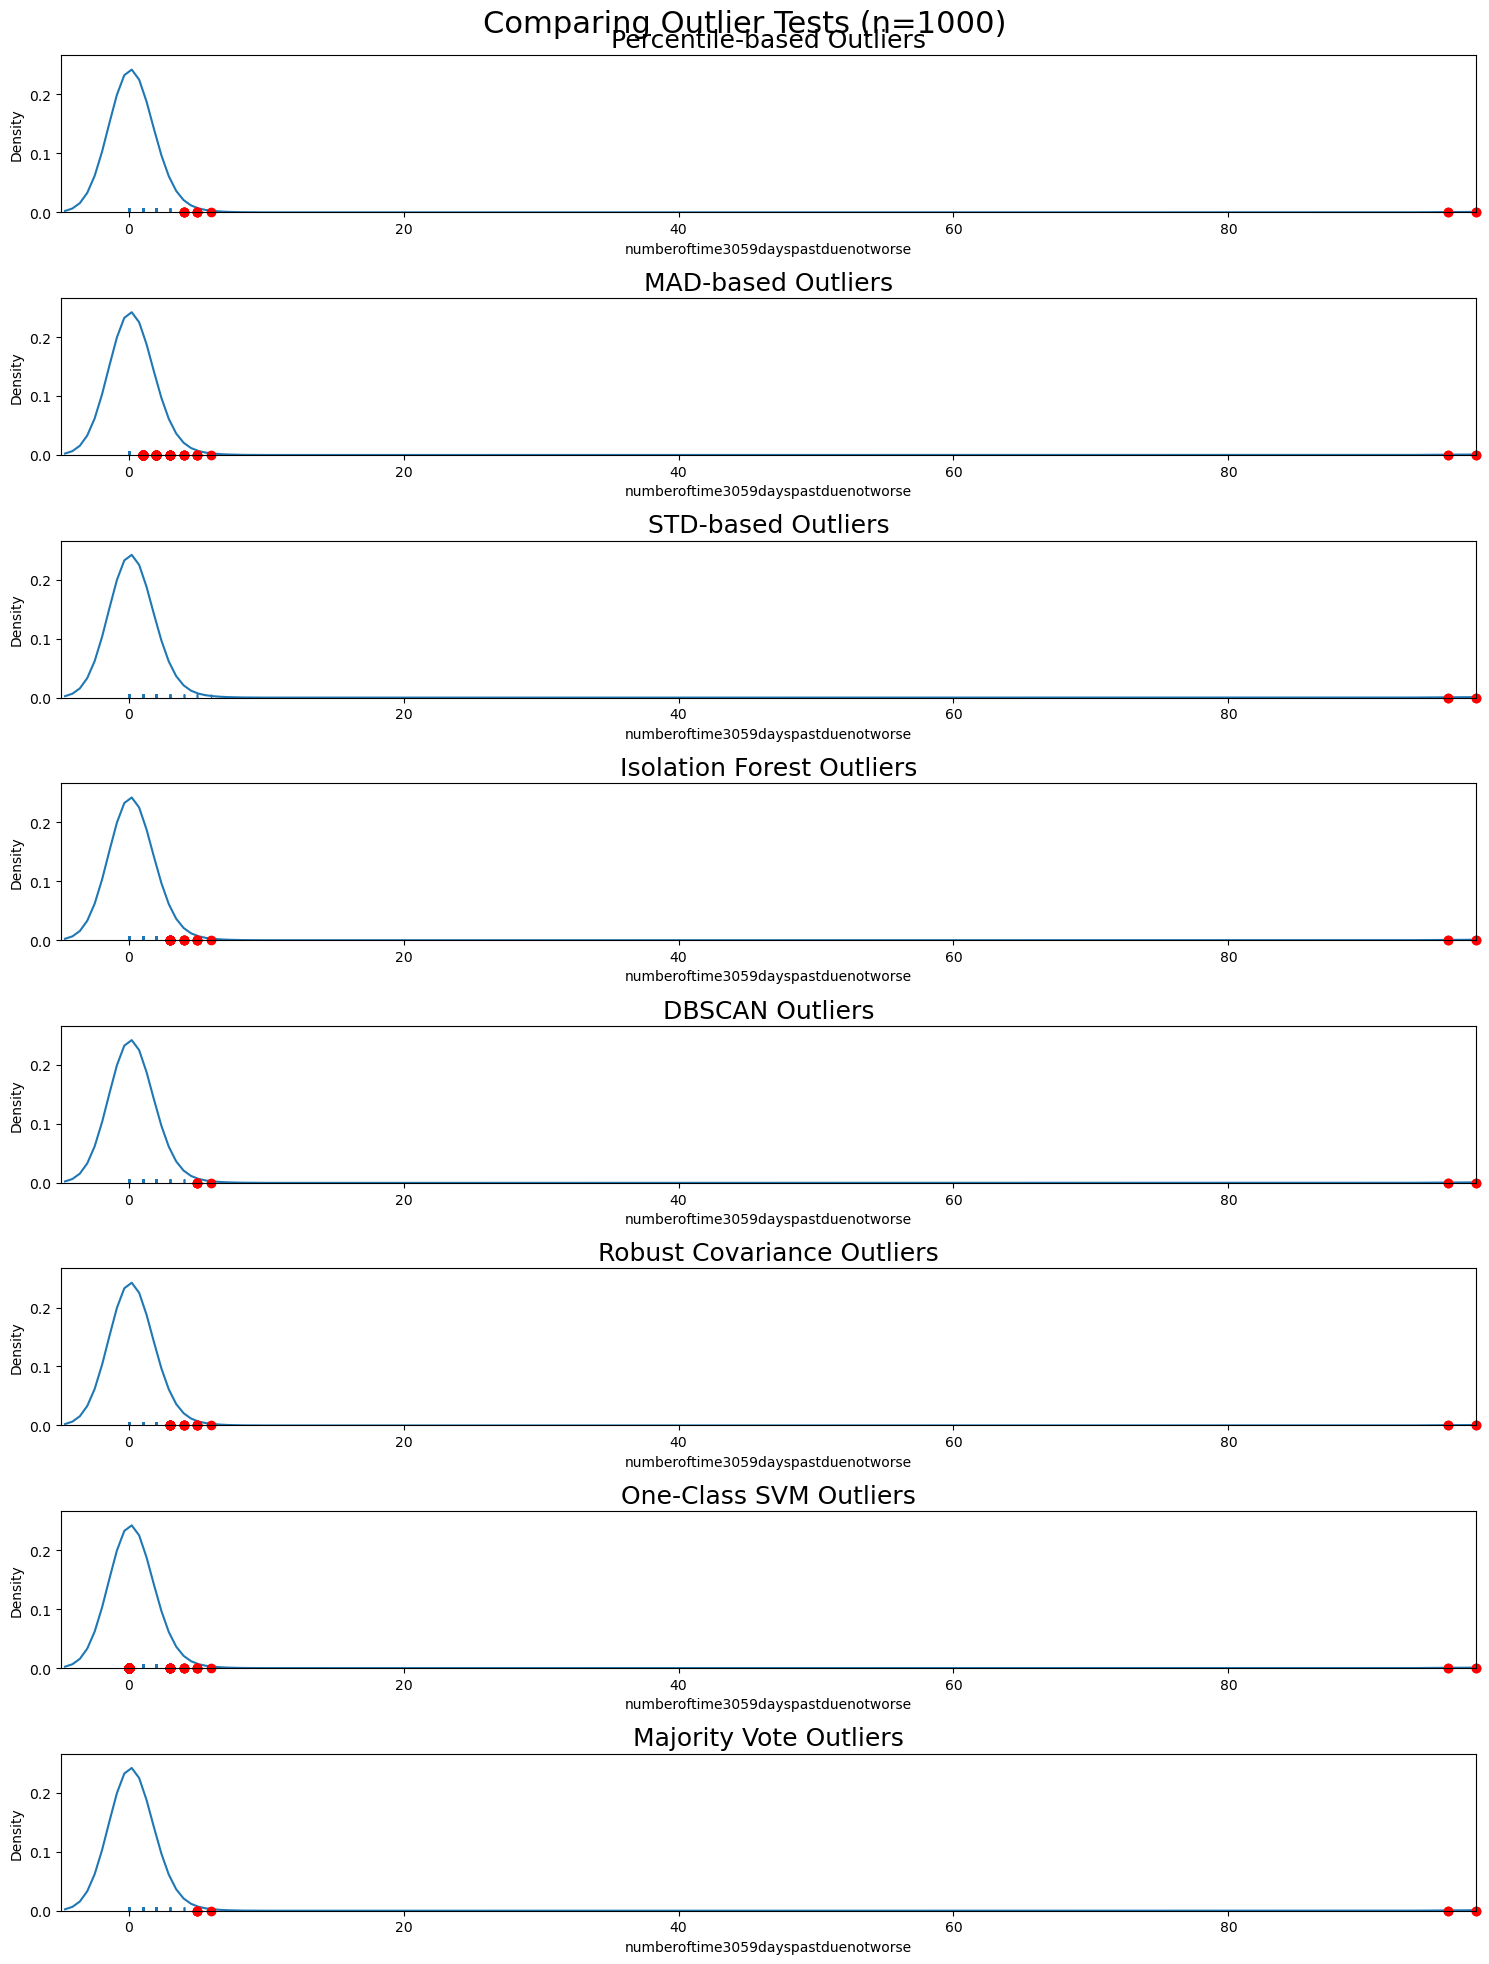

In [505]:
plotOutlier(training_data.numberoftime3059dayspastduenotworse.sample(1000))

C:\Users\yeung\AppData\Local\Temp\ipykernel_10588\729217769.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax, rug=True, hist=False)
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instea

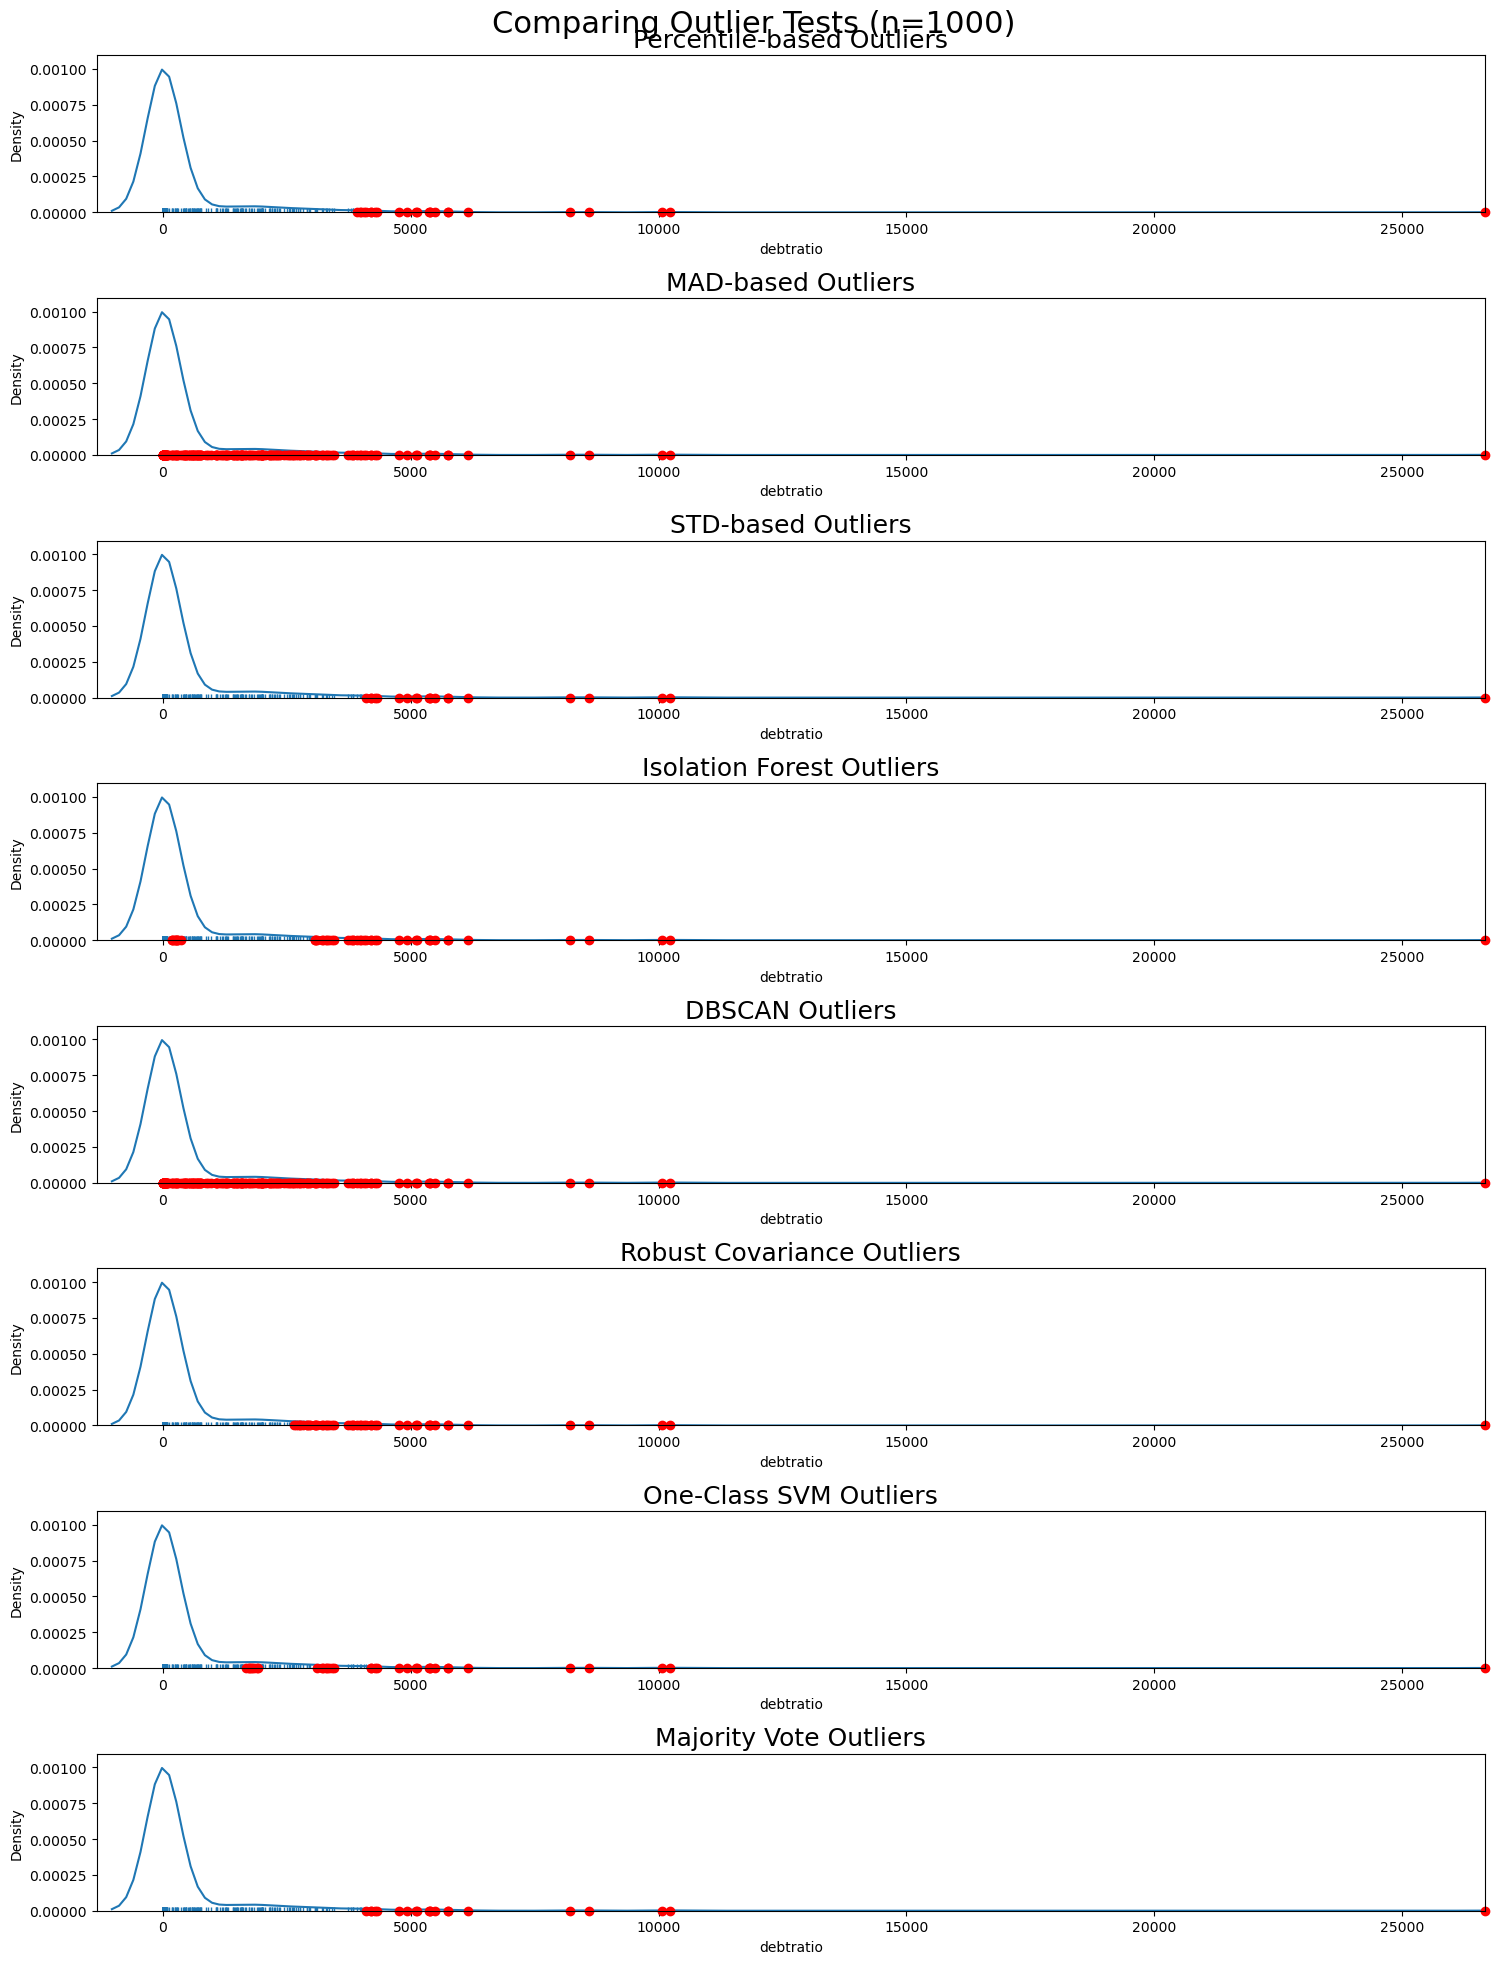

In [506]:
plotOutlier(training_data.debtratio.sample(1000))

C:\Users\yeung\AppData\Local\Temp\ipykernel_10588\729217769.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax, rug=True, hist=False)
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instea

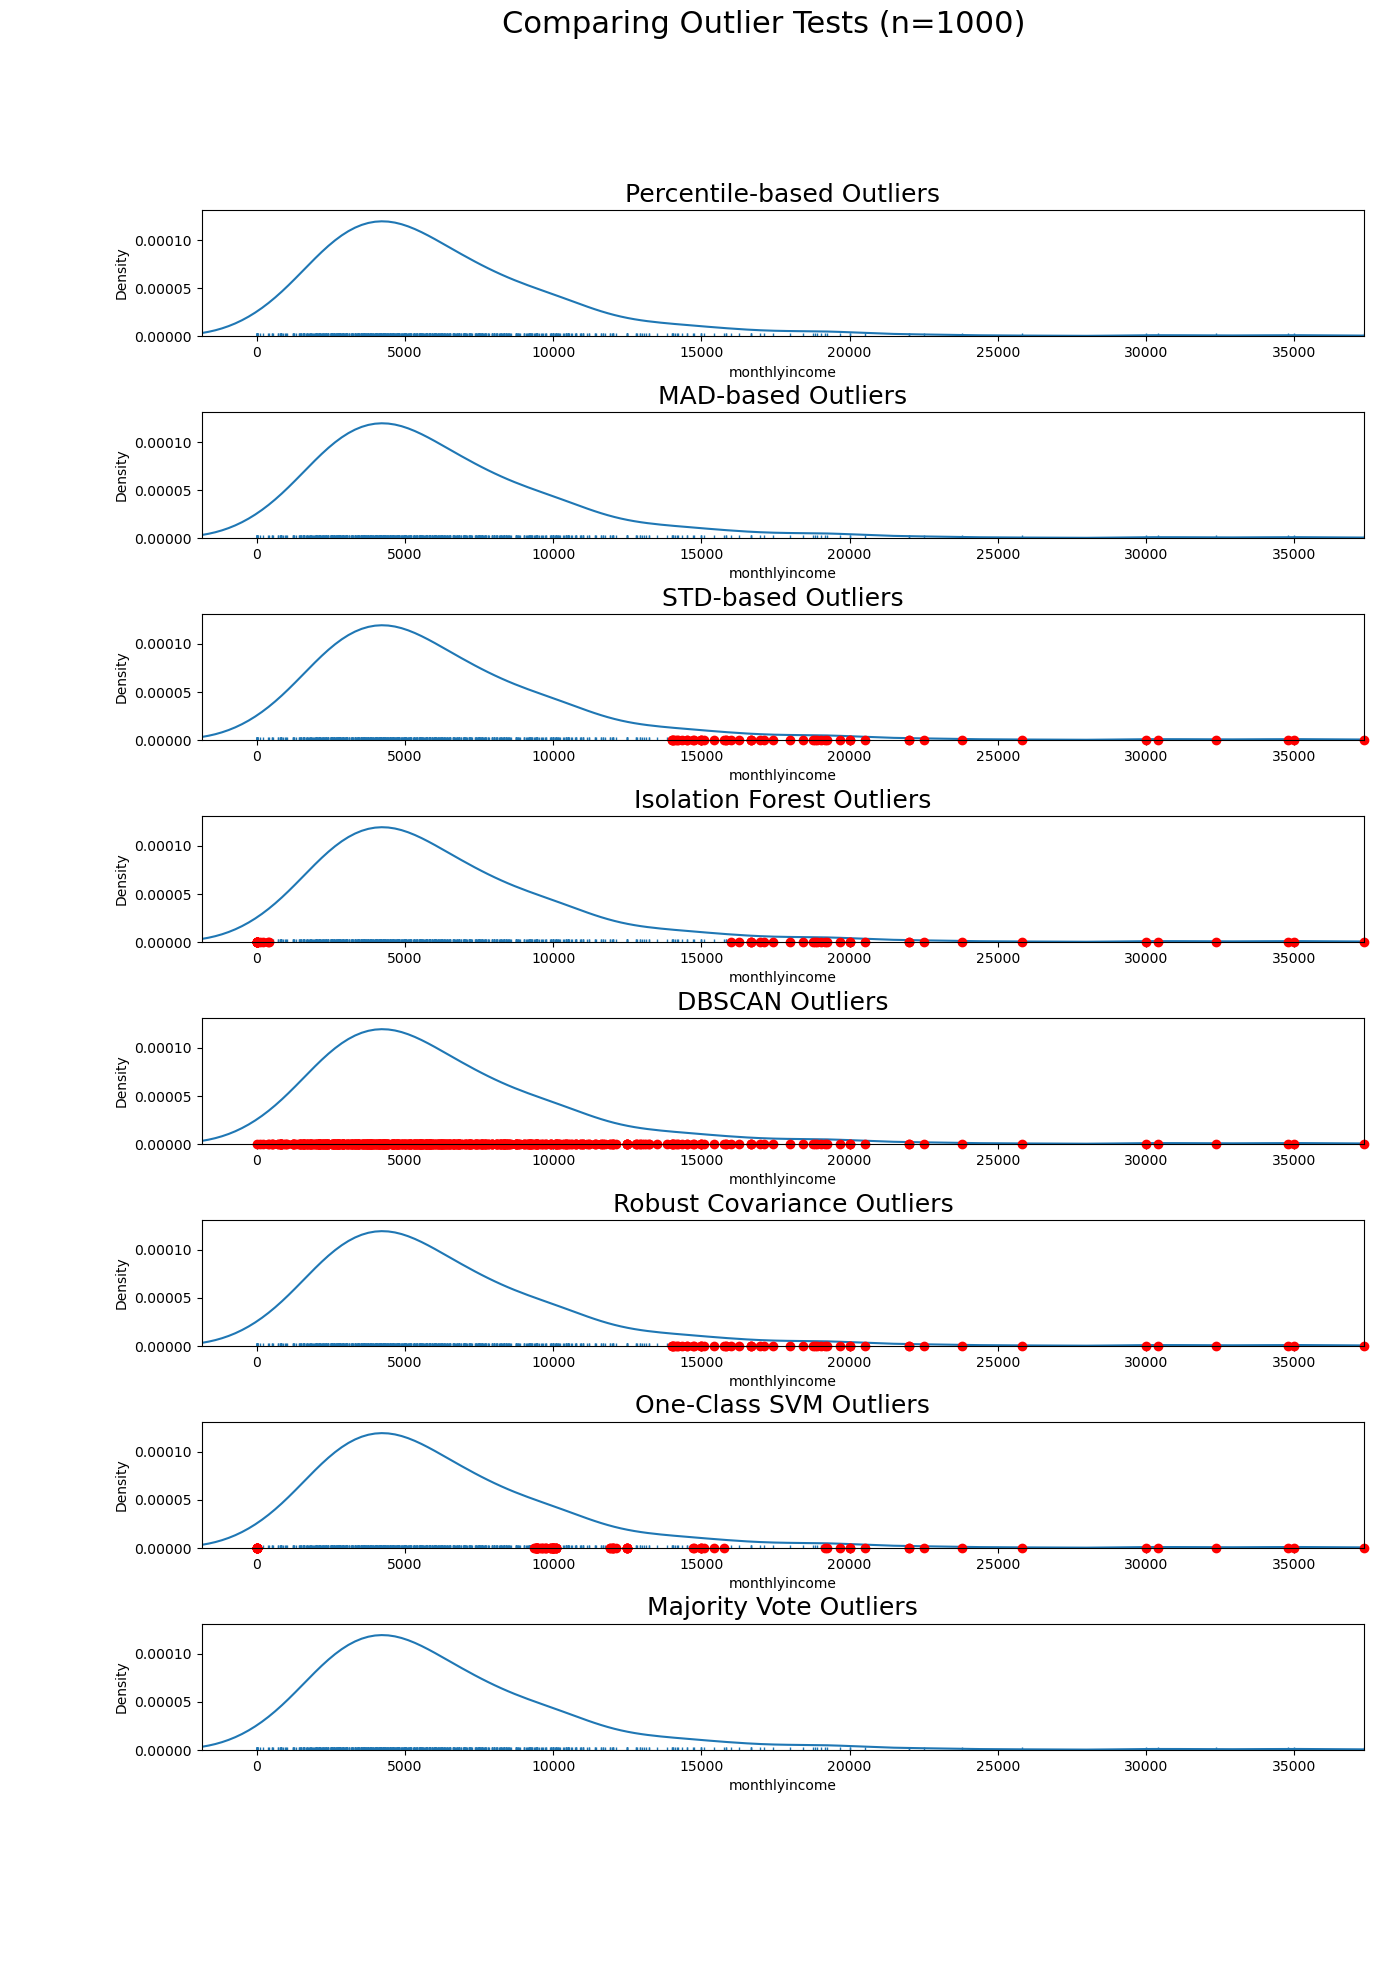

In [507]:
plotOutlier(training_data.monthlyincome.sample(1000))

C:\Users\yeung\AppData\Local\Temp\ipykernel_10588\729217769.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax, rug=True, hist=False)
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instea

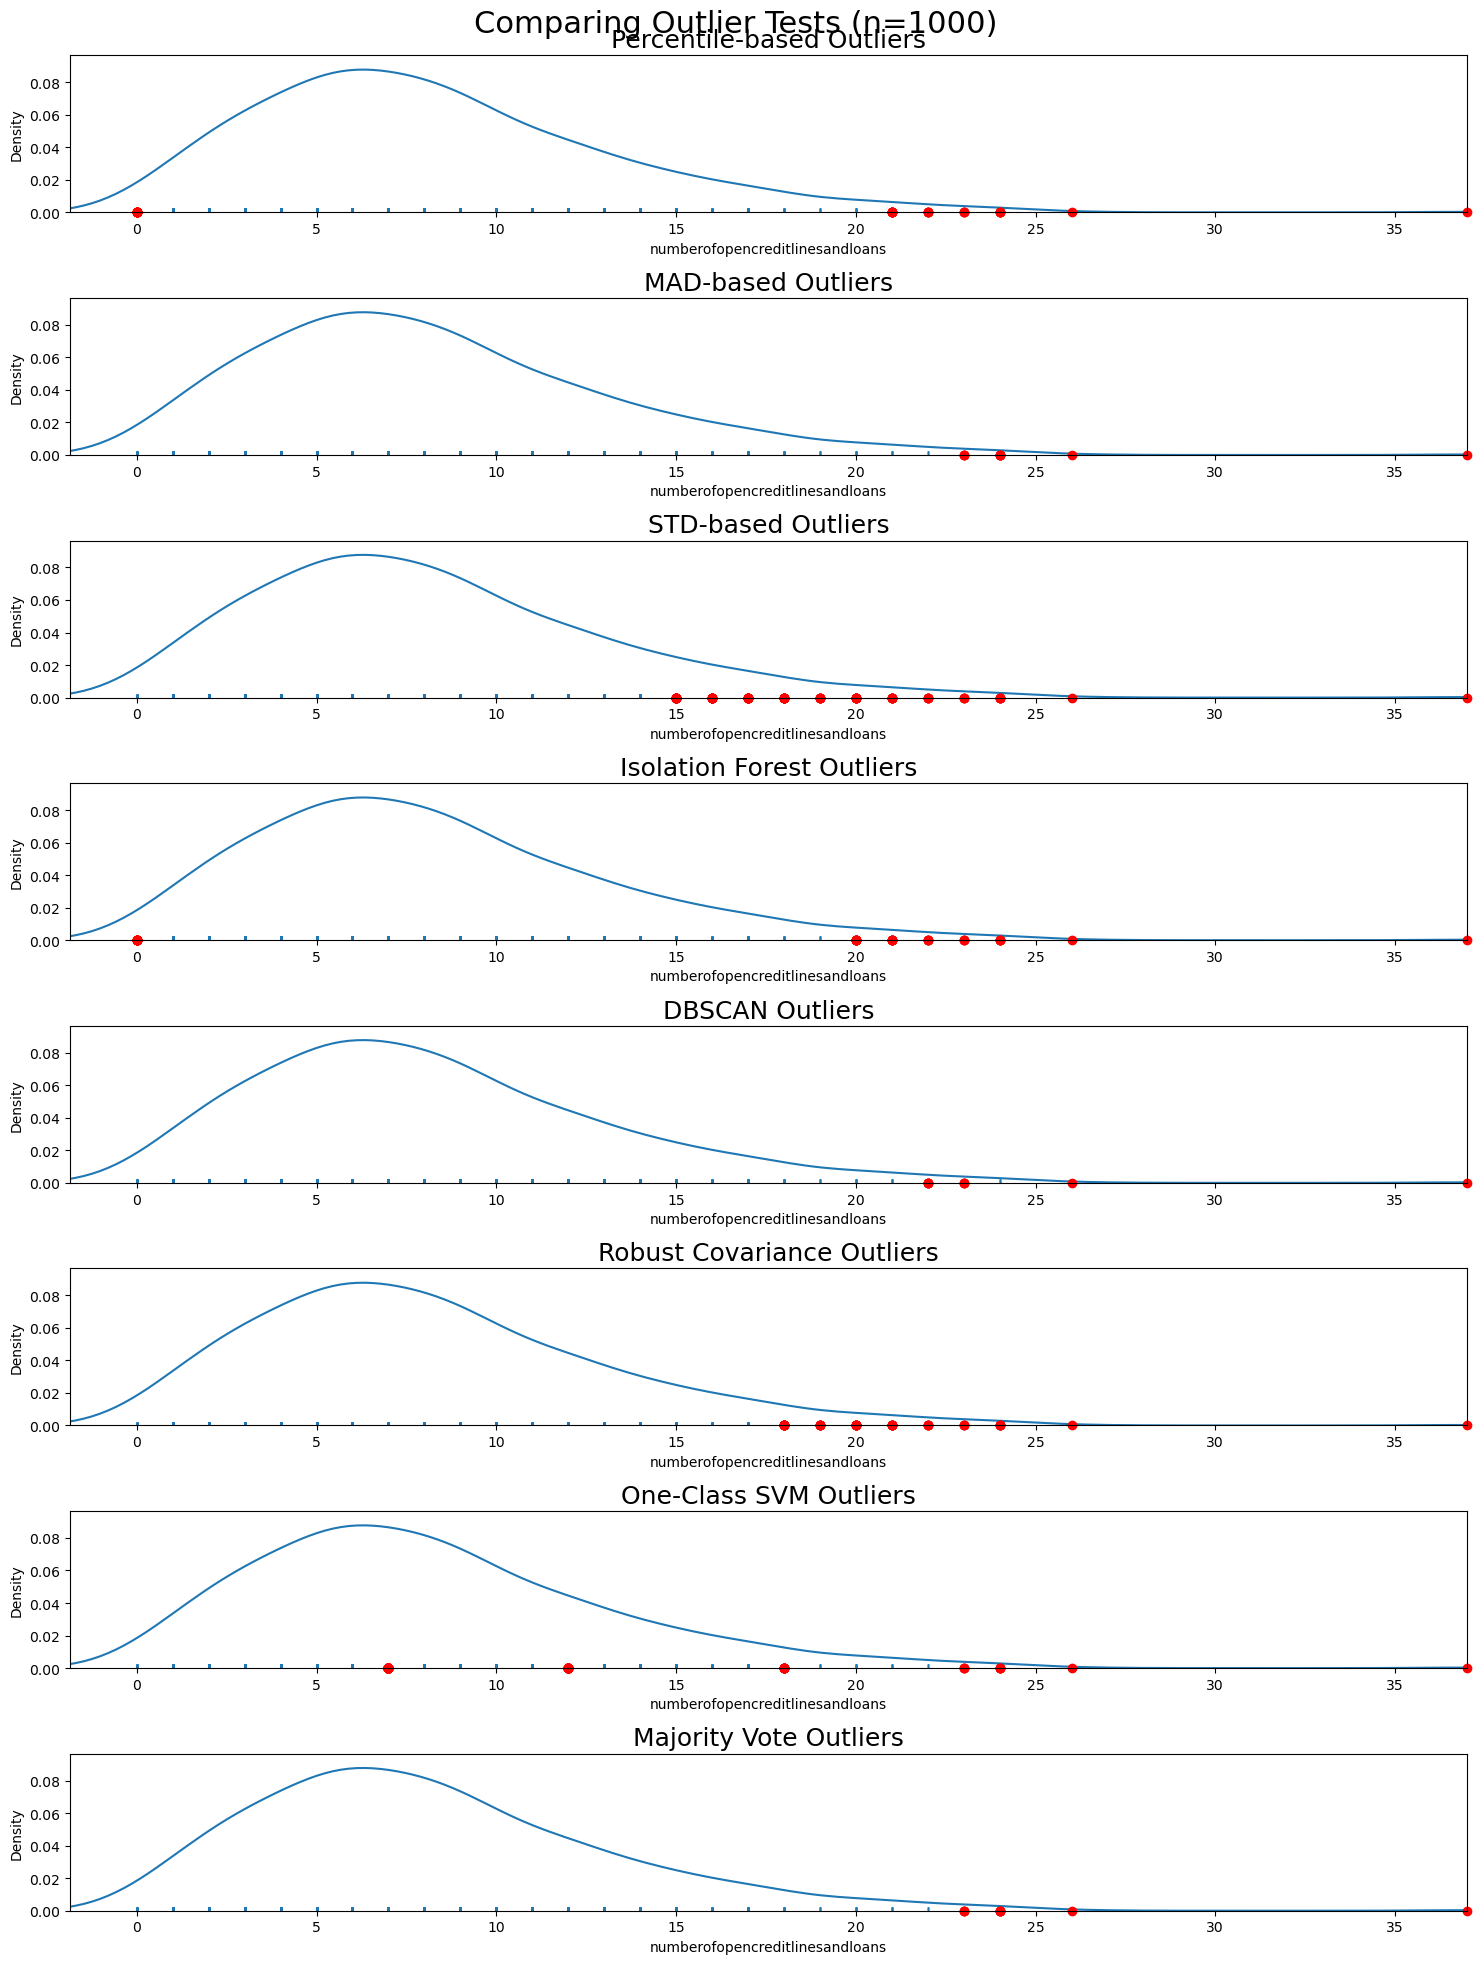

In [508]:
plotOutlier(training_data.numberofopencreditlinesandloans.sample(1000))

C:\Users\yeung\AppData\Local\Temp\ipykernel_10588\729217769.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax, rug=True, hist=False)
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instea

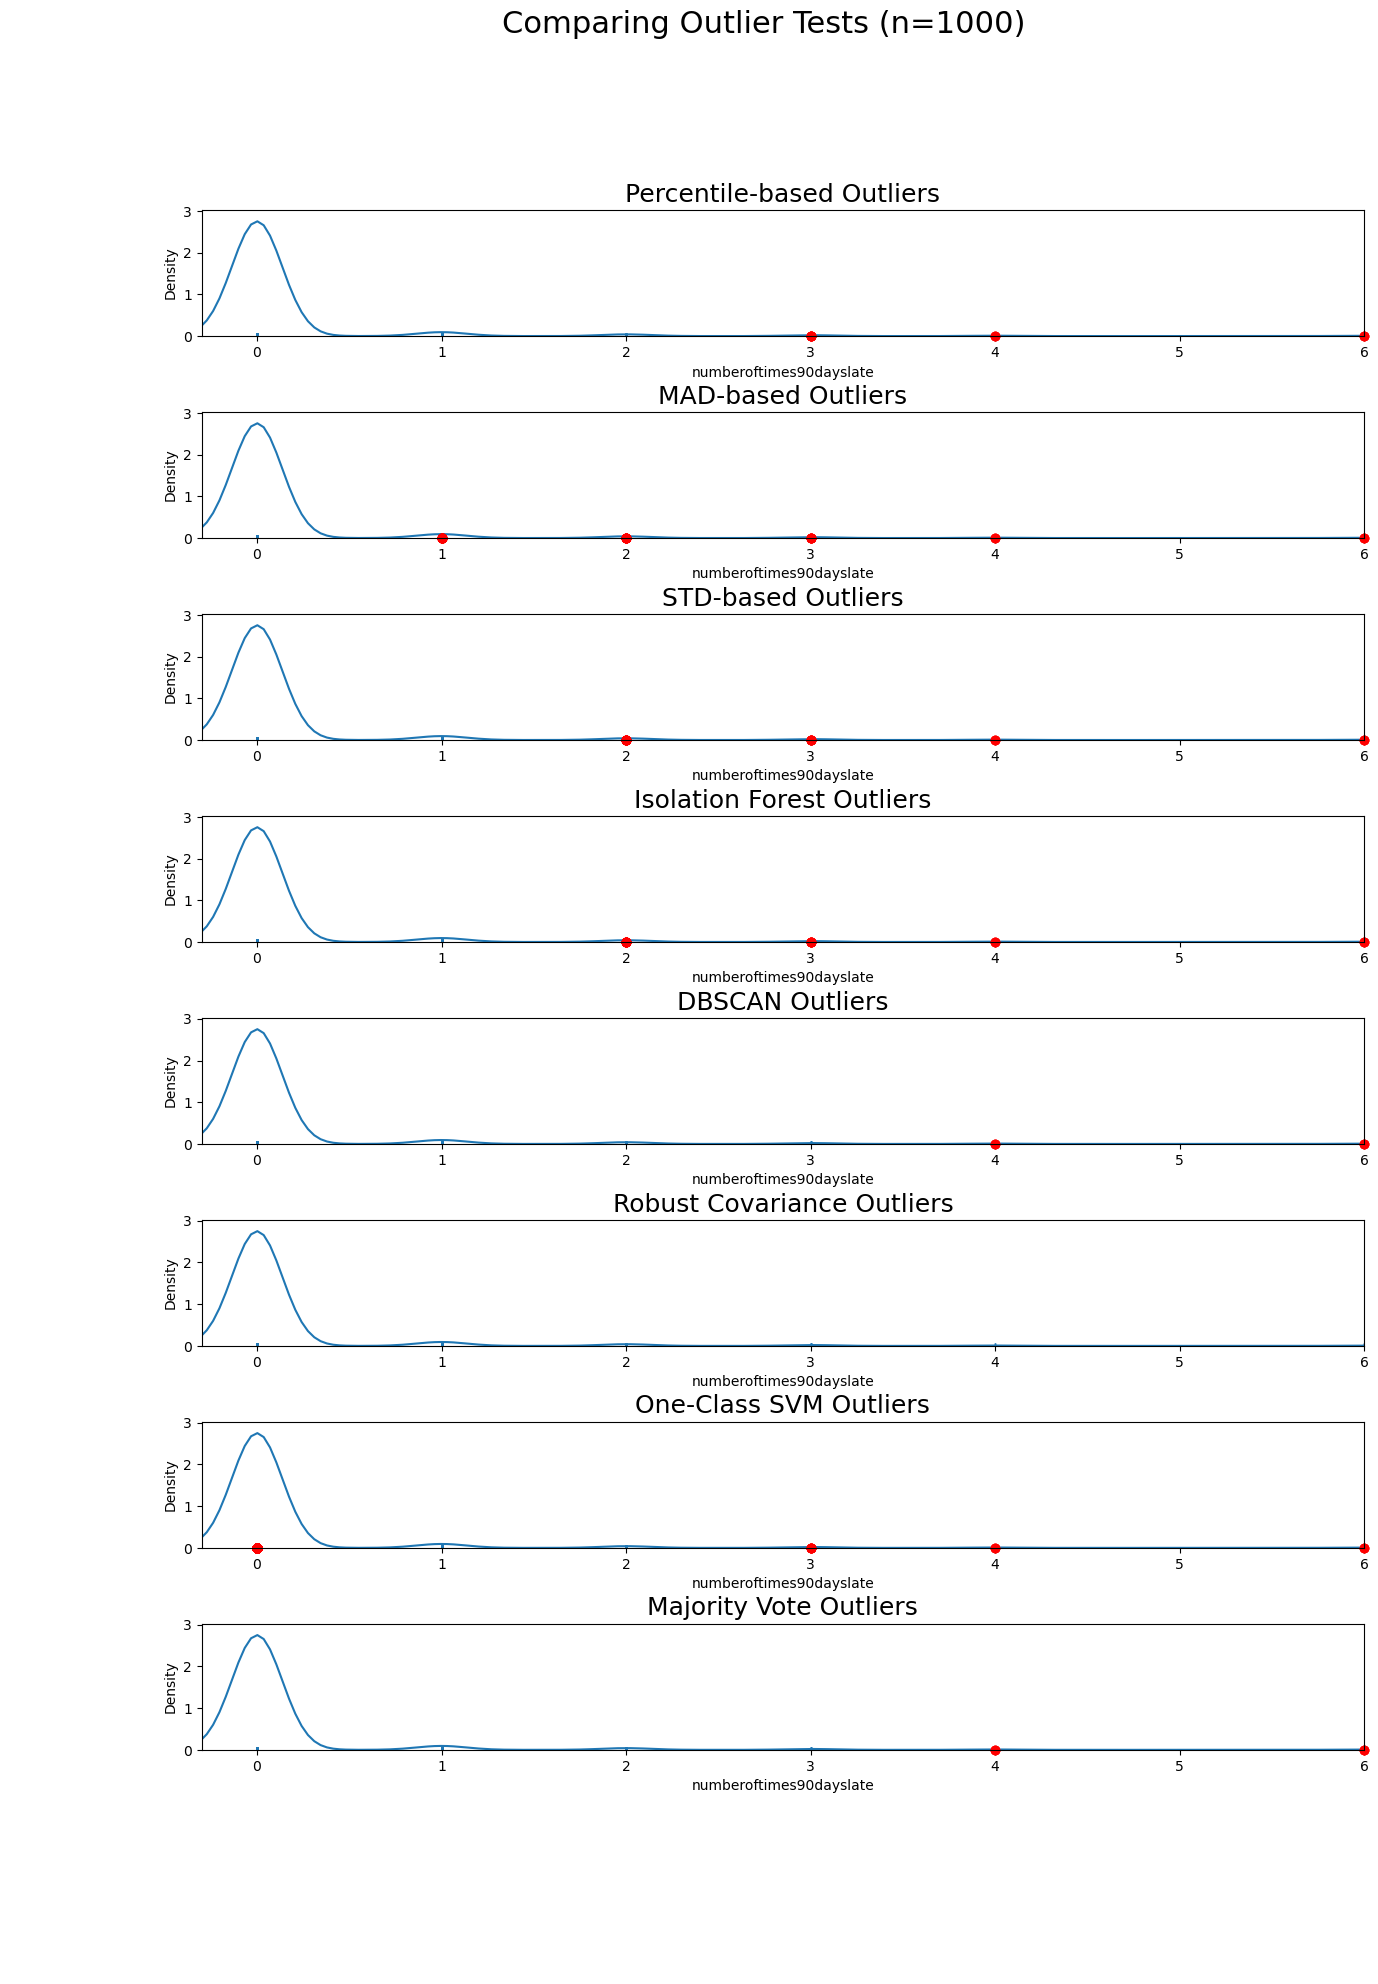

In [509]:
plotOutlier(training_data.numberoftimes90dayslate.sample(1000))

C:\Users\yeung\AppData\Local\Temp\ipykernel_10588\729217769.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax, rug=True, hist=False)
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instea

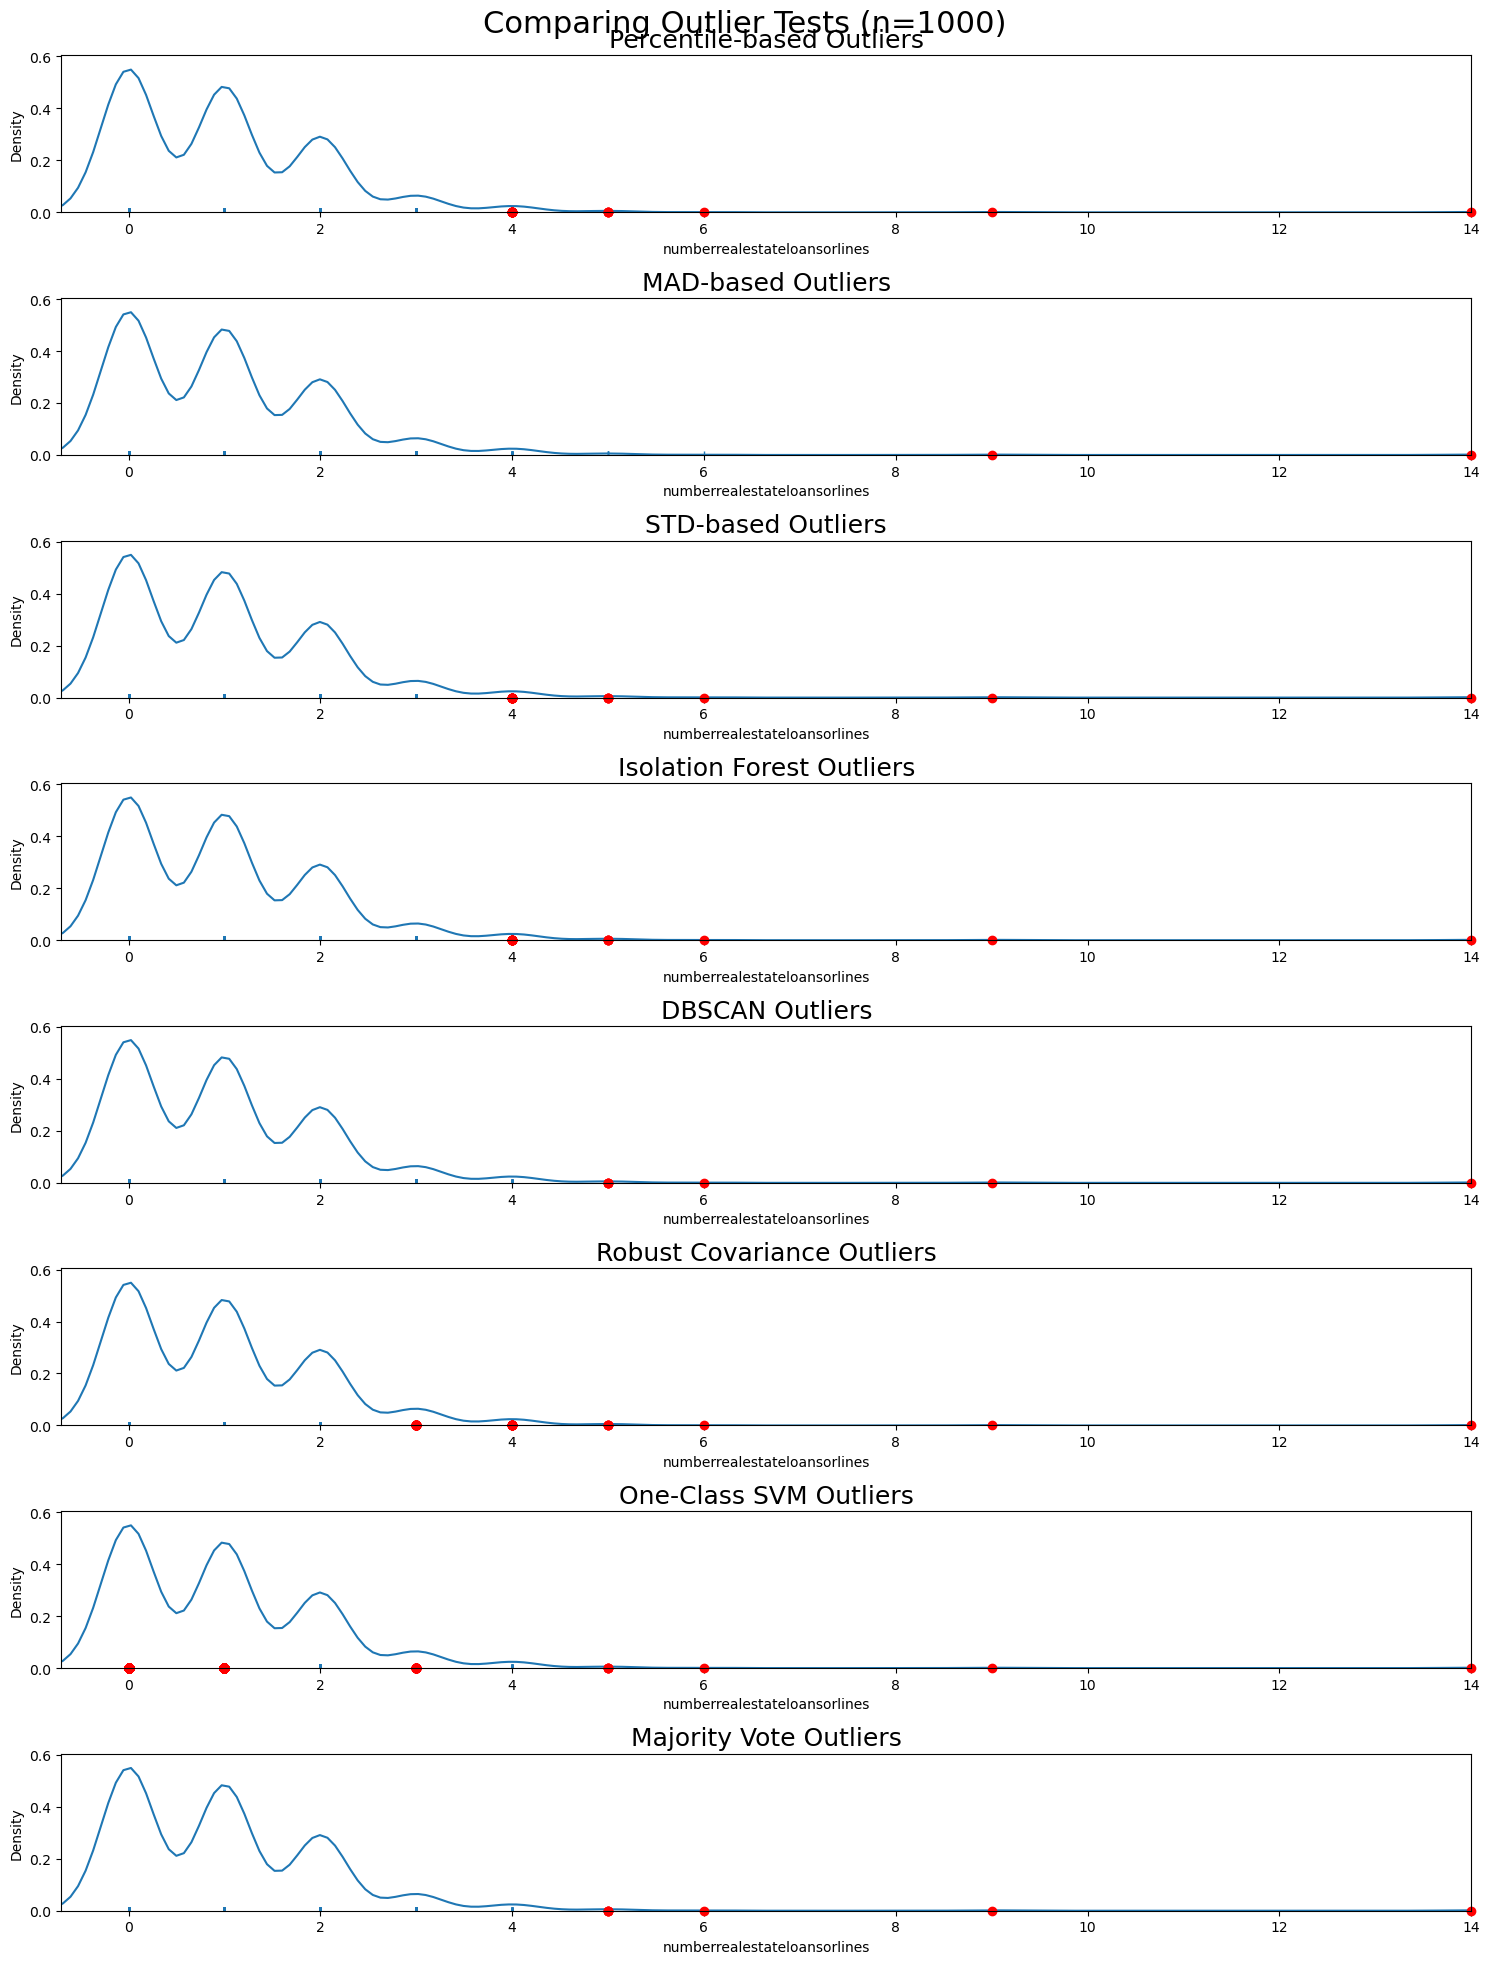

In [510]:
plotOutlier(training_data.numberrealestateloansorlines.sample(1000))

C:\Users\yeung\AppData\Local\Temp\ipykernel_10588\729217769.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax, rug=True, hist=False)
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instea

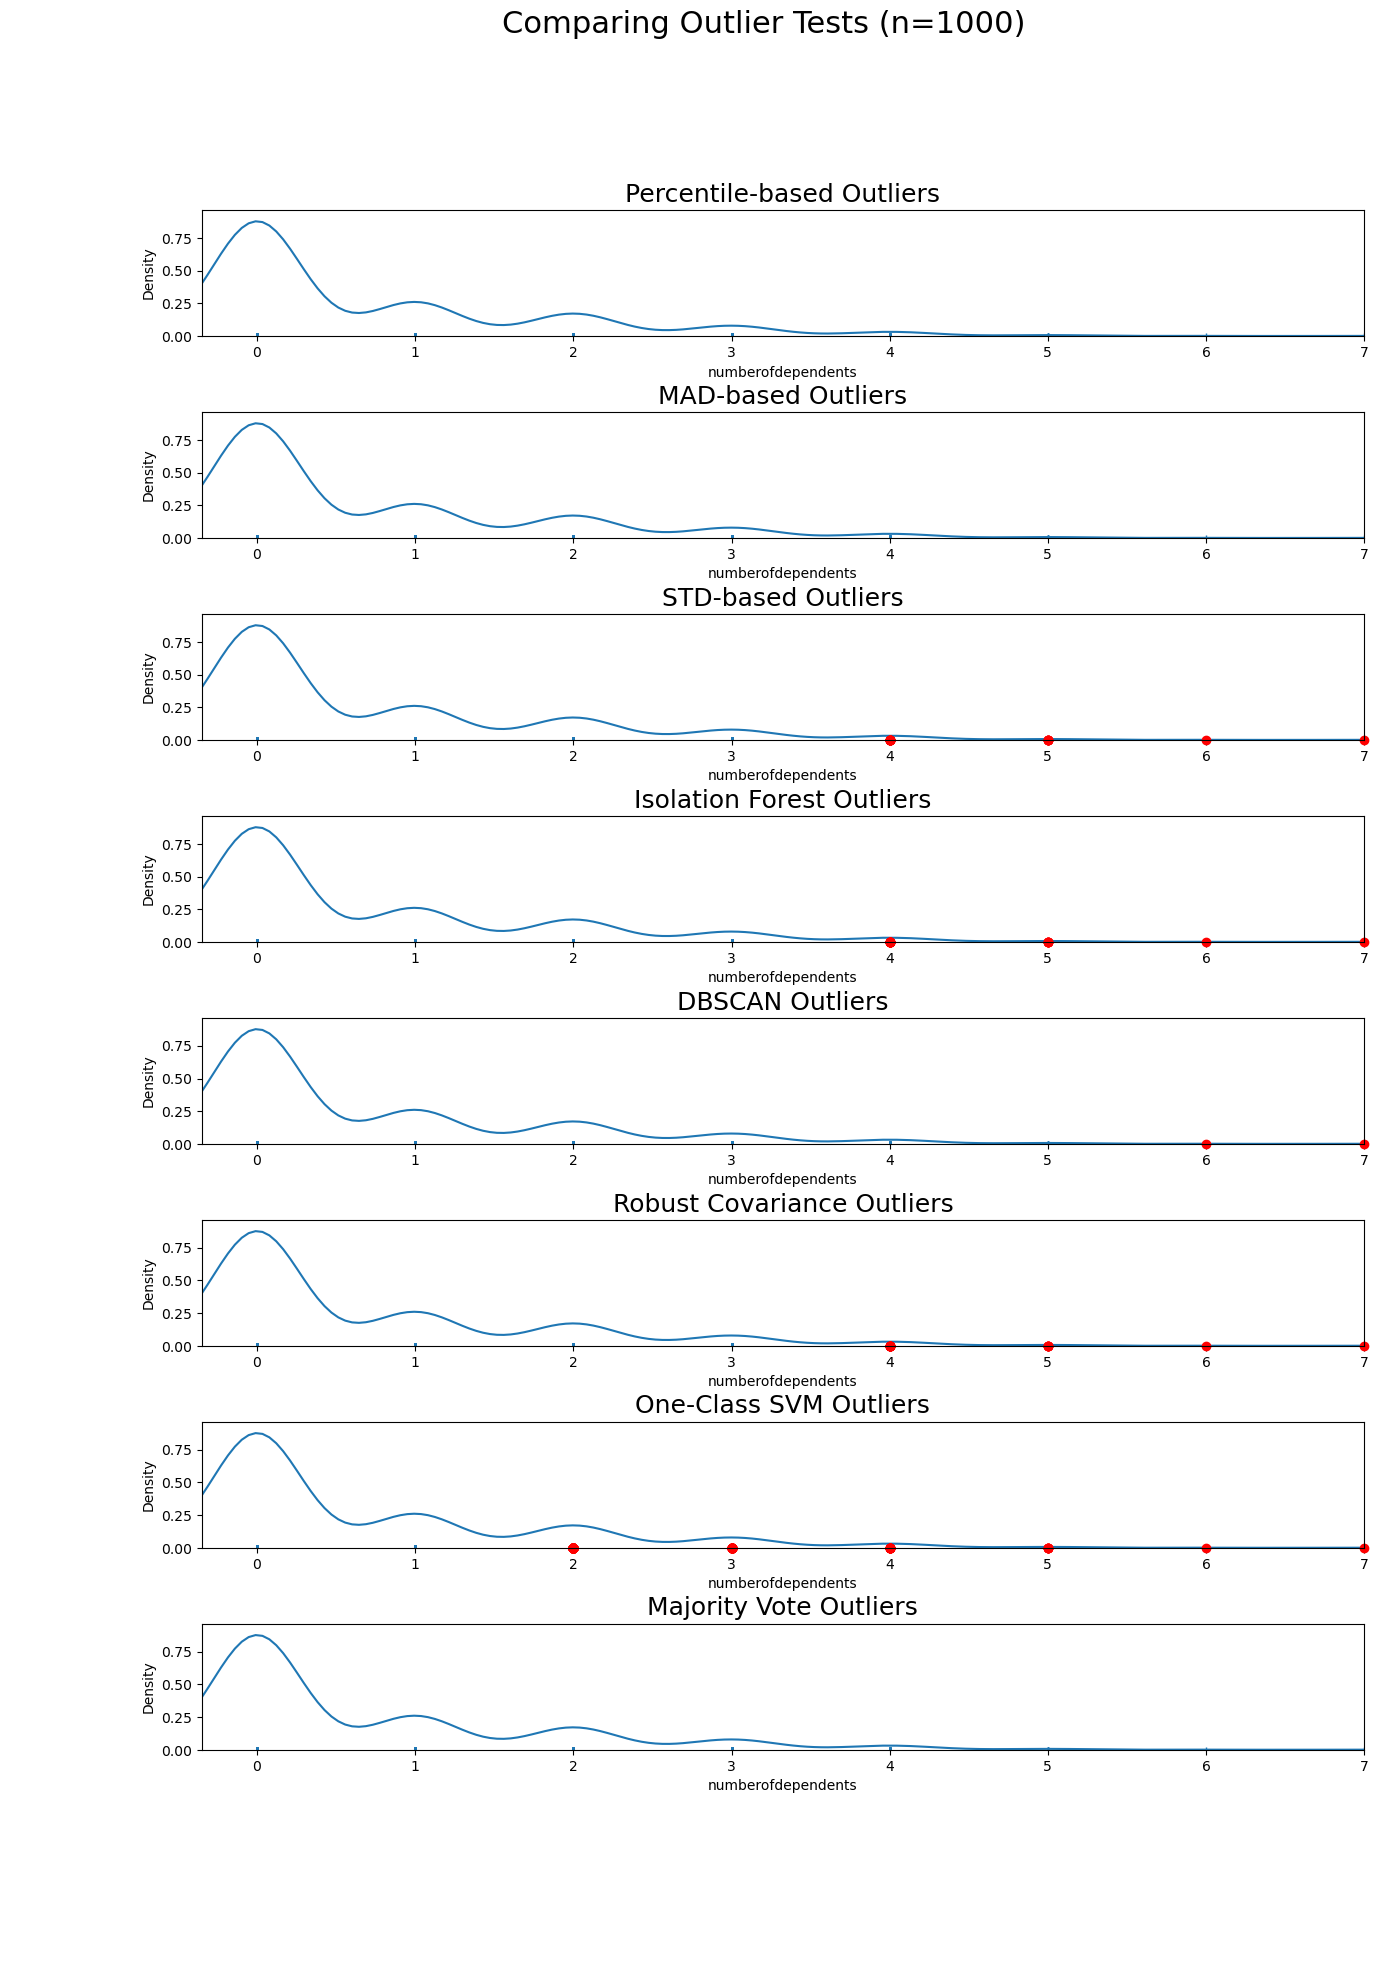

In [511]:
plotOutlier(training_data.numberofdependents.sample(1000))

C:\Users\yeung\AppData\Local\Temp\ipykernel_10588\729217769.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax, rug=True, hist=False)
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yeung\Downloads\06\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instea

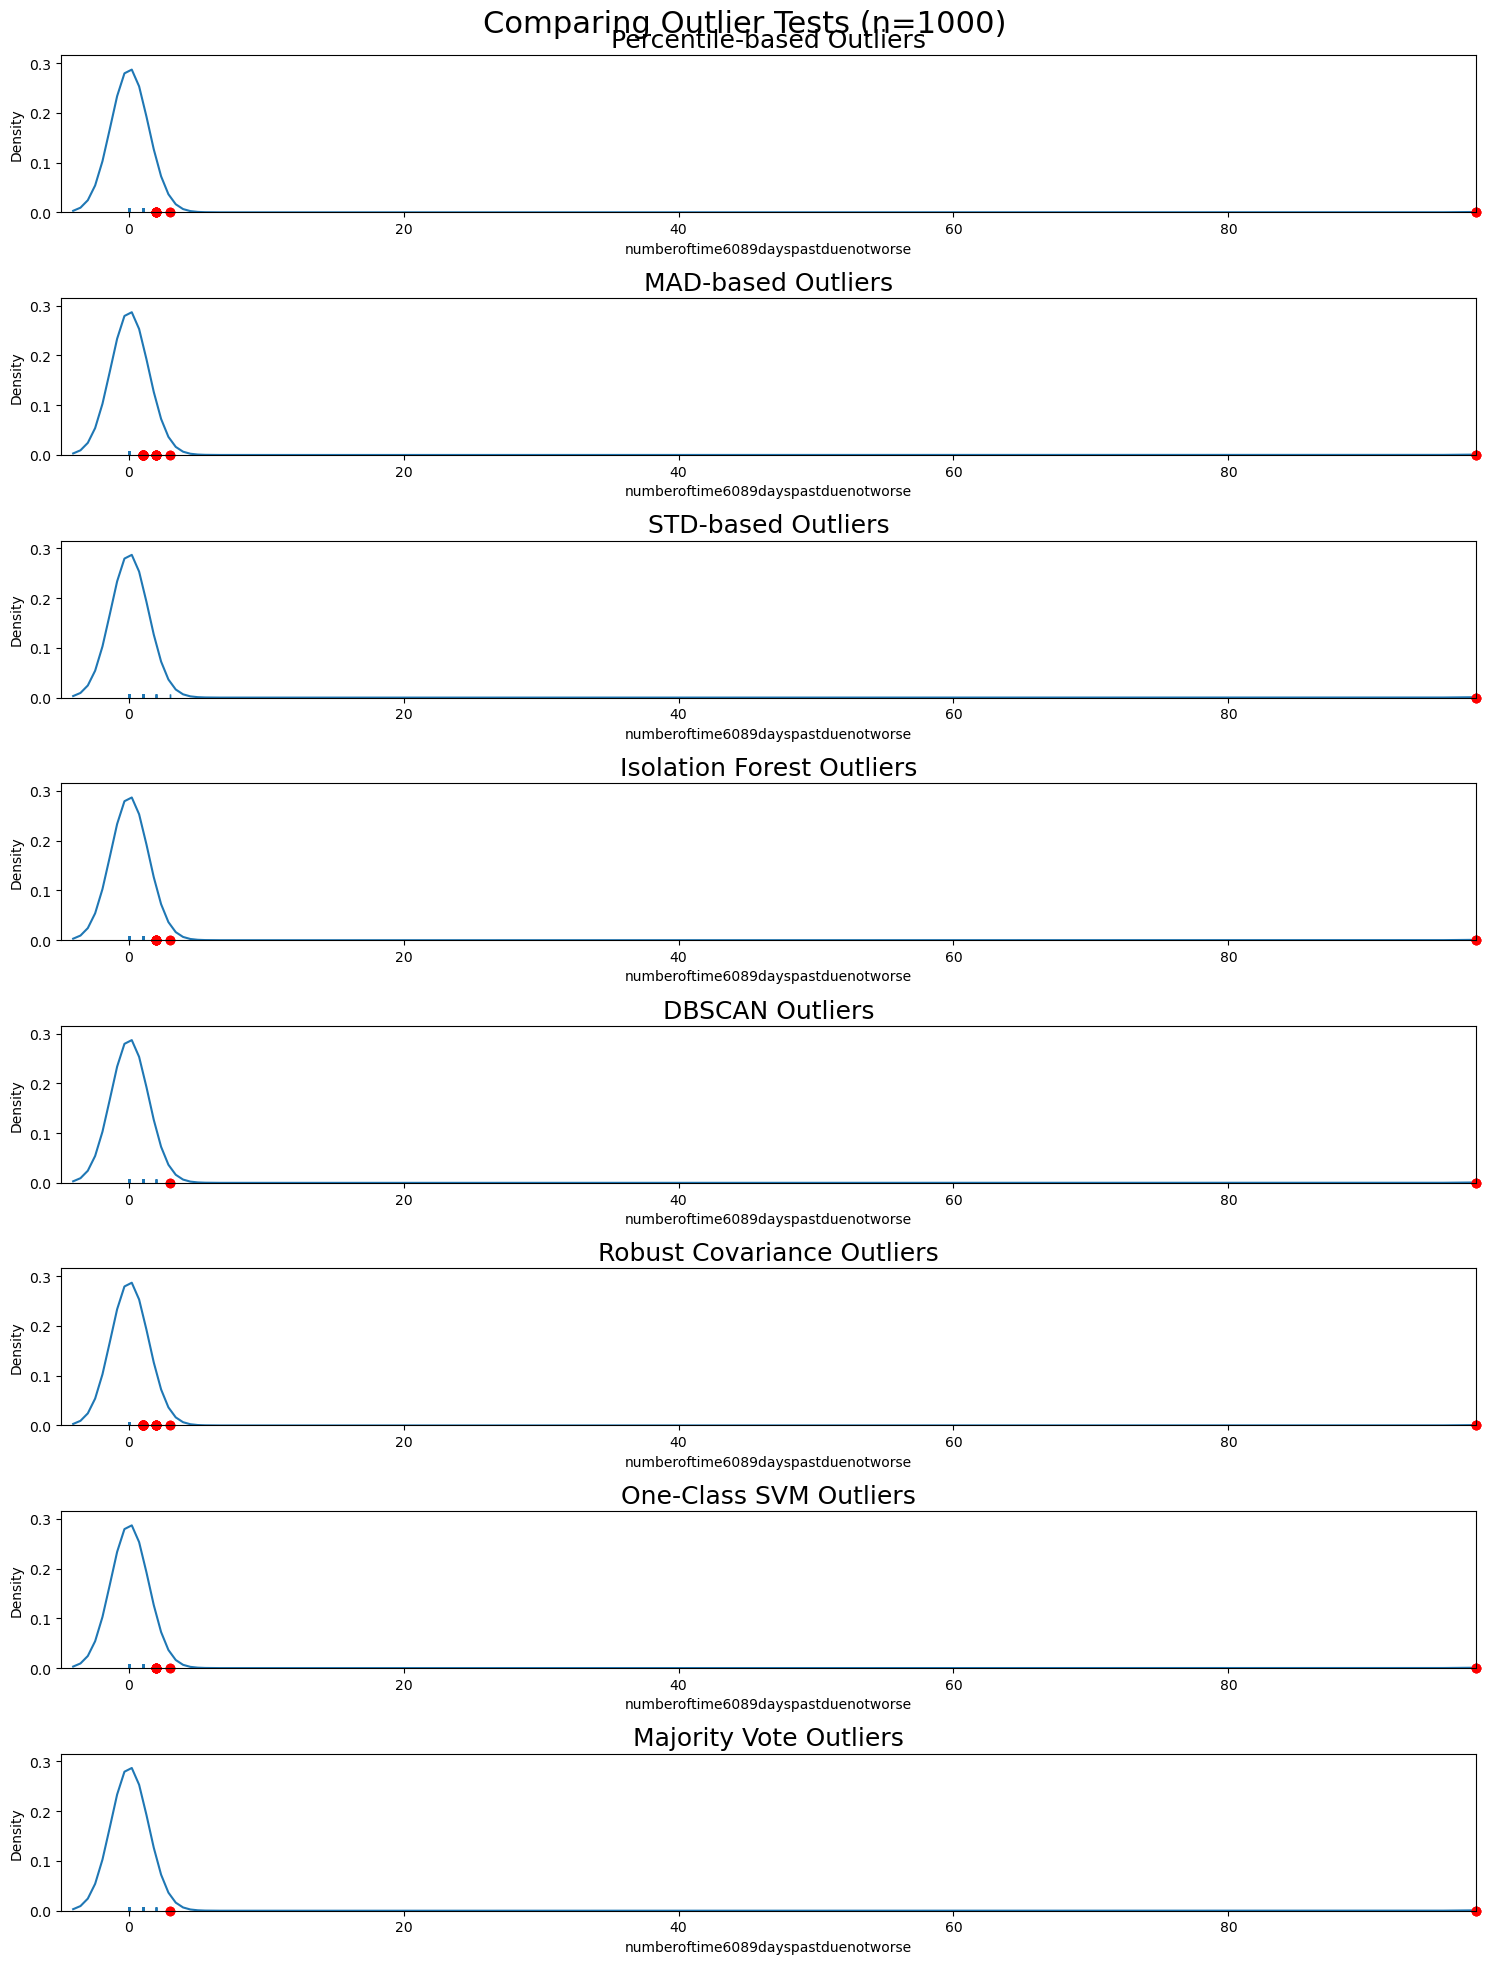

In [512]:
plotOutlier(training_data.numberoftime6089dayspastduenotworse.sample(1000))